## Previsão de doenças cardíacas utilizando o modelo RandomForestClassifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('heart1.csv')
df

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,0


#### Explicação de cada coluna
<b> Age: </b> idade do paciente <br>
<b> Gender: </b> sexo do paciente (Feminino = 0, Masculino = 1) <br>
<b> CP: </b> pericardite constritiva. <br>
<b> Trestbps: </b> pressão arterial. <br>
<b> Chol: </b> níveis de colesterol. <br>
<b> Fbs: </b> nível de glicose em jejum. <br>
<b> Restecg: </b> resultado de eletrocardiograma (Normal = 0, Anormal = 1). <br>
<b> Thalach: </b> frequência cardíaca máxima. <br>
<b> Exang: </b> angina induzida por exercício (Não ocorreu = 0, Ocorreu = 1).  <br>
<b> Oldpeak: </b> depressão do segmento ST induzida por exercício em relação ao repouso. <br>
<b> Slope: </b> inclinação do segmento ST/frequência cardíaca (ST/FC). <br>
<b> CA: </b> nível de cálcio. <br>
<b> Target: </b> apresenta ou não complicação cardíaca (Não apresenta = 0, Apresenta = 1)

### Tipo dos dados, valores nulos e estatística descritiva

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  target    303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


In [4]:
df.isnull().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
target      0
dtype: int64

In [5]:
df.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,1.000000


### Visualização dos dados

In [6]:
sns.set_theme(rc={'figure.figsize':(14,5)})

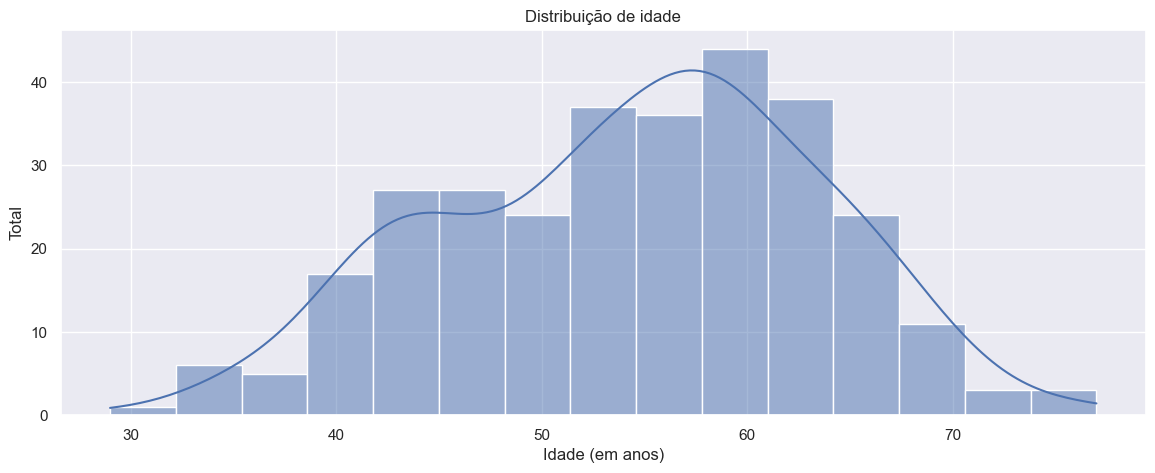

In [7]:
sns.histplot(df, x=df.age, bins=15, kde=True).set_title('Distribuição de idade')
plt.xlabel('Idade (em anos)') 
plt.ylabel('Total')
plt.show()

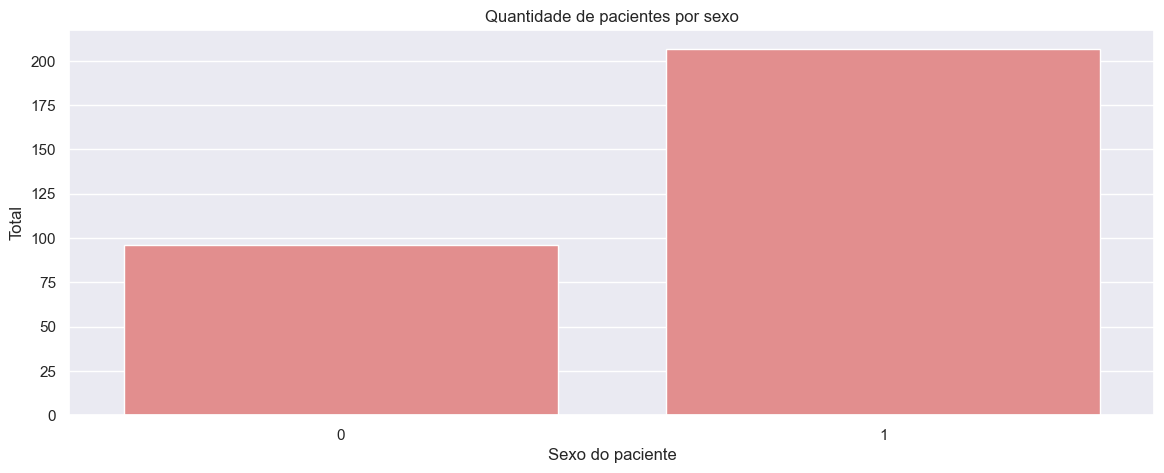

In [8]:
#Lembrete: 0 representa o sexo feminino, 1 representa o sexo masculino
sns.countplot(df, x=df.gender, color="lightcoral").set_title("Quantidade de pacientes por sexo")
plt.xlabel("Sexo do paciente")
plt.ylabel("Total")
plt.show()

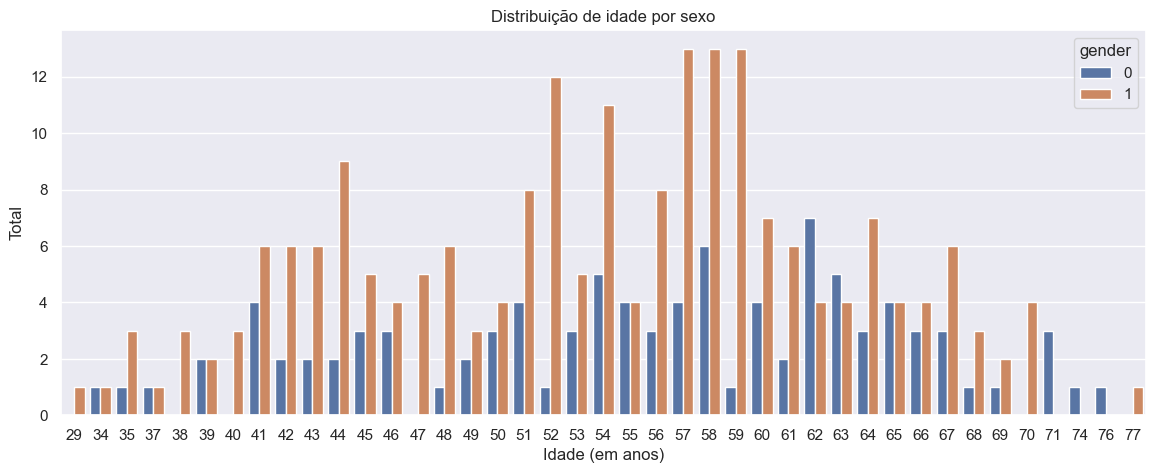

In [9]:
sns.countplot(df, x=df.age, hue=df.gender).set_title("Distribuição de idade por sexo")
plt.xlabel("Idade (em anos)")
plt.ylabel("Total")
plt.show()

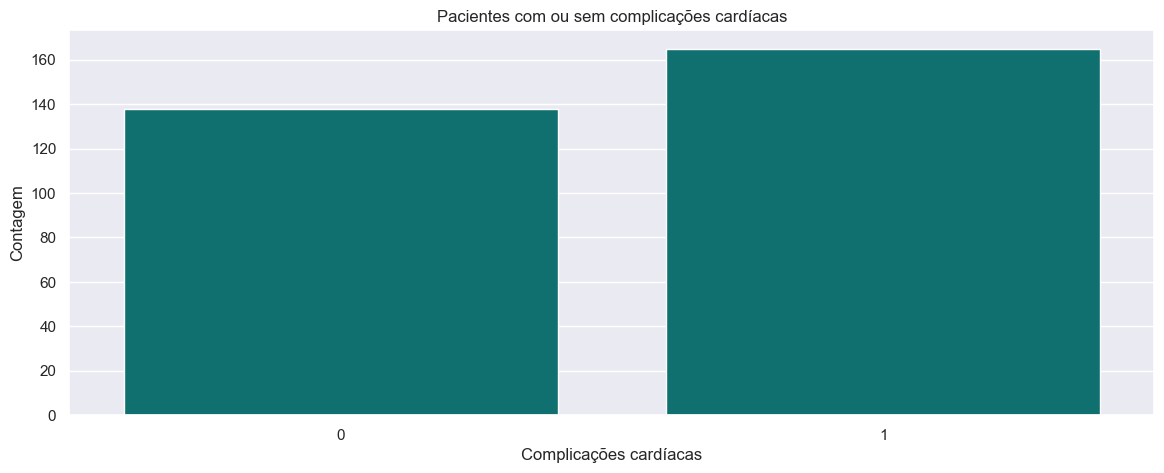

In [10]:
sns.countplot(df, x=df.target, color="teal").set_title("Pacientes com ou sem complicações cardíacas")
plt.xlabel("Complicações cardíacas")
plt.ylabel("Contagem")
plt.show()

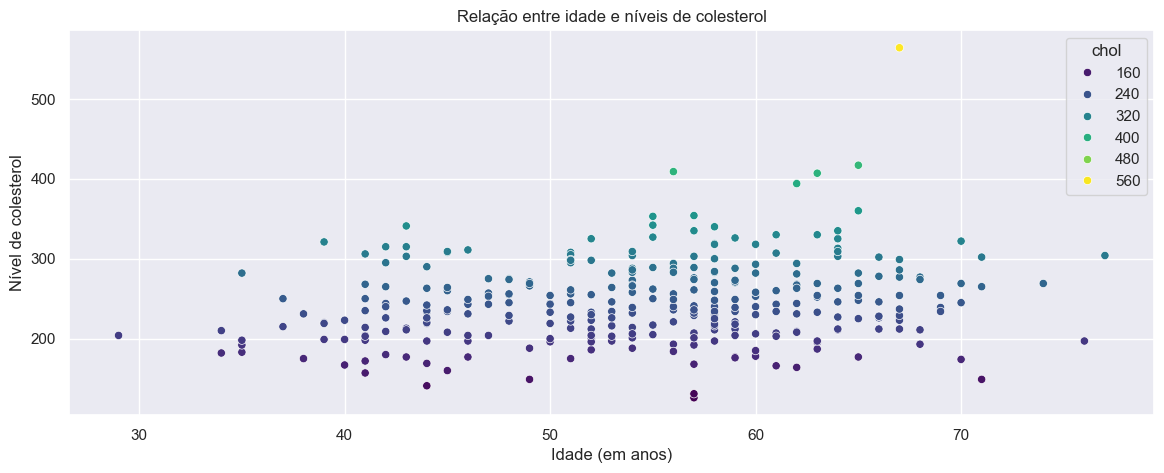

In [11]:
sns.scatterplot(df, x=df.age, y=df.chol, hue=df.chol, palette="viridis").set_title("Relação entre idade e níveis de colesterol")
plt.xlabel("Idade (em anos)")
plt.ylabel("Nível de colesterol")
plt.show()

- Níveis de colesterol aumentam conforme o aumento de idade.

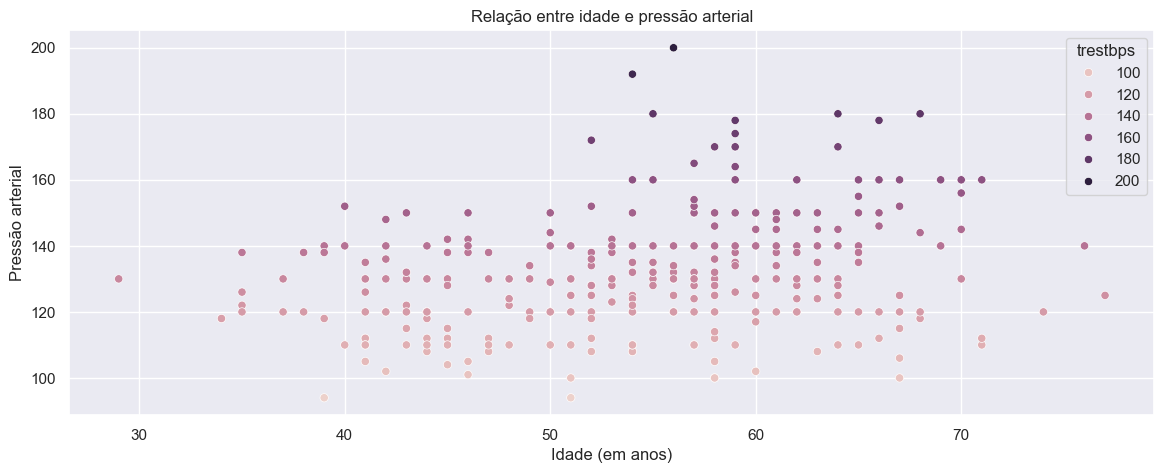

In [12]:
sns.scatterplot(df, x=df.age, y=df.trestbps, hue=df.trestbps).set_title("Relação entre idade e pressão arterial")
plt.xlabel("Idade (em anos)")
plt.ylabel("Pressão arterial")
plt.show()

- A pressão arterial aumenta conforme a idade aumenta.

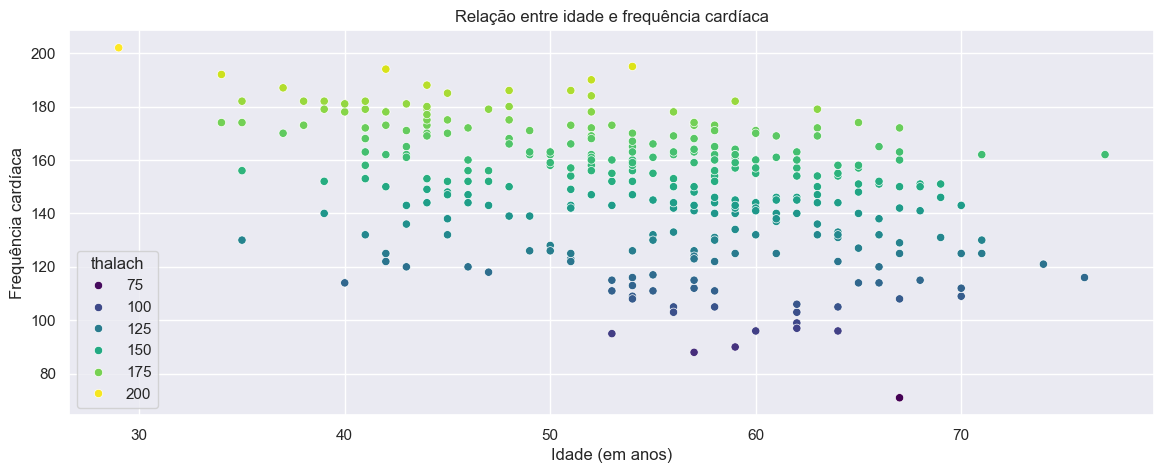

In [13]:
sns.scatterplot(df, x=df.age, y=df.thalach, hue=df.thalach, palette="viridis").set_title("Relação entre idade e frequência cardíaca")
plt.xlabel("Idade (em anos)")
plt.ylabel("Frequência cardíaca")
plt.show()

- A frequência cardíaca diminui conforme a idade.

### Valores discrepantes (outliers)

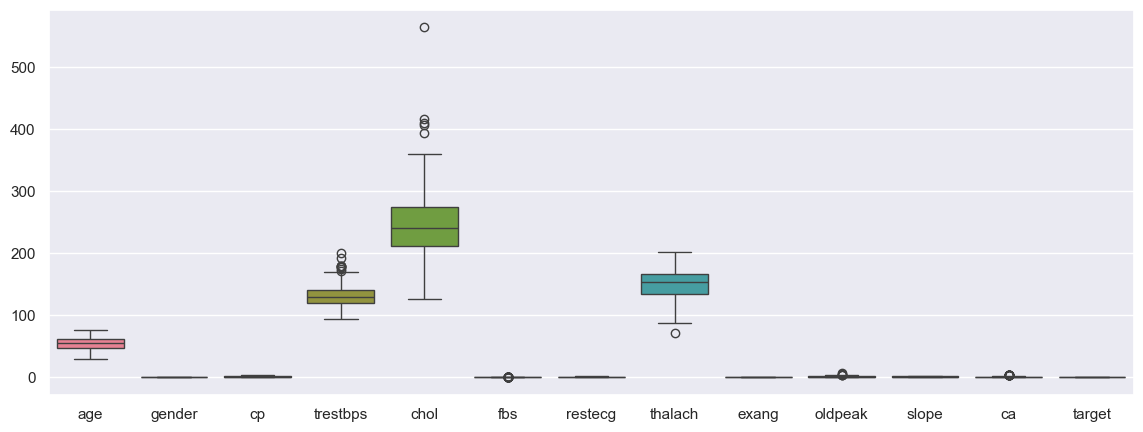

In [14]:
sns.boxplot(df)
plt.show()

- Os pontos localizados fora das caixas são os valores discrepantes (outliers) dos nossos dados.
- As colunas <b>trestbps, chol e thalach</b> apresentam o maior número de outliers e, por isso, esses pontos discrepantes devem passar por tratamento antes que se construa um modelo de machine learning.

##### Função para tratamento de outliers

In [15]:
def tratamento_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    menores = Q1 - 1.5 * IQR
    maiores = Q3 + 1.5 * IQR
    dataframe[column] = np.where(dataframe[column] > maiores, maiores,
                                 np.where(dataframe[column] < menores, menores, dataframe[column]))
    return dataframe

In [16]:
tratamento_outliers(df, "trestbps")
tratamento_outliers(df, "chol")
tratamento_outliers(df, "thalach")

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,1
4,57,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,0
299,45,1,3,110.0,264.0,0,1,132.0,0,1.2,1,0,0
300,68,1,0,144.0,193.0,1,1,141.0,0,3.4,1,2,0
301,57,1,0,130.0,131.0,0,1,115.0,1,1.2,1,1,0


#### Construindo o modelo

In [17]:
#Definindo features e target do modelo
X = df[["age","gender","cp","trestbps", "chol", "fbs", "restecg", "thalach","exang","oldpeak","slope", "ca"]]
y = df["target"]

In [18]:
#Dividindo o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Os valores para n_estimators e max_depth foram modificados até até que se obtivesse valores maiores de acúracia, precisão, revocação e f1-score. Esses valores são apresentados ao final do notebook juntamente com um mapa de calor para visualização da matriz de confusão.

In [24]:
modelo = RandomForestClassifier(n_estimators=200, max_depth=5)

In [25]:
modelo.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200)

In [26]:
y_predic = modelo.predict(X_test)

In [27]:
CR = classification_report(y_test,y_predic)
print(CR)

              precision    recall  f1-score   support

           0       0.74      0.71      0.72        35
           1       0.76      0.78      0.77        41

    accuracy                           0.75        76
   macro avg       0.75      0.75      0.75        76
weighted avg       0.75      0.75      0.75        76



<Axes: >

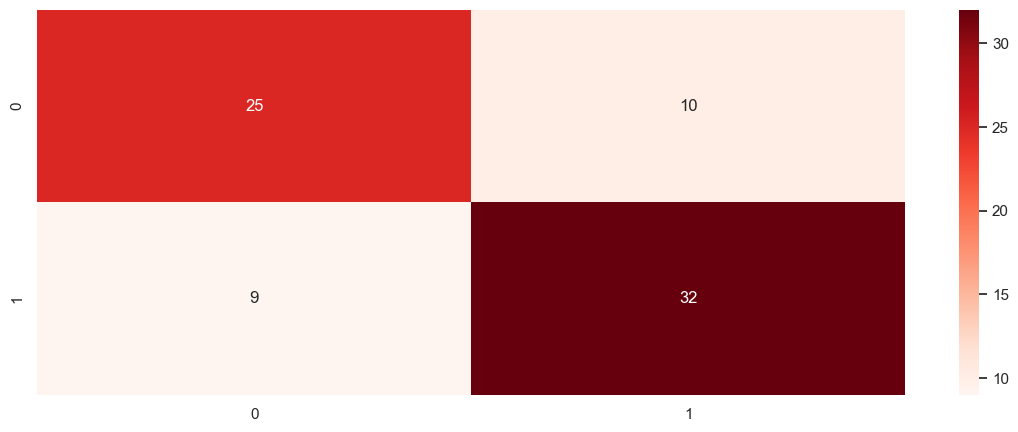

In [28]:
conf_matrix = confusion_matrix(y_test,y_predic)
sns.heatmap(conf_matrix, annot = True, cmap = 'Reds')

### Considerações finais

O modelo construído resultou na predição de 25 verdadeiros positivos e 32 verdadeiros negativos, uma média de 75% de precisão, acurácia, revocação e f1-score. <br>
Sumariamente, pode-se dizer que o modelo consegue prever complicações cardíacas com base nas características utilizadas. Para melhores resultados deve-se modificar os valores de n_estimators e max_depth. Uma reavaliação das características também é capaz de melhorar os resultados.